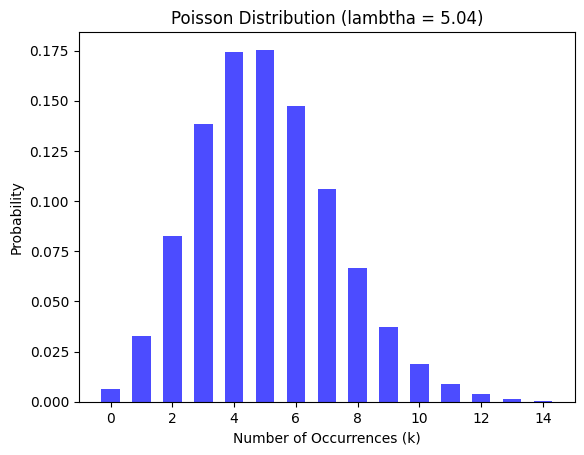

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(1, 1001, size=10000).tolist()

class Poisson:
    def __init__(self, data=None, lambtha=1.):
        if data is None:
            if lambtha <= 0:
                raise ValueError("lambtha must be a positive value")
            self.lambtha = float(lambtha)
        else:
            if not isinstance(data, list):
                raise TypeError("data must be a list")
            if len(data) < 2:
                raise ValueError("data must contain multiple values")
            self.lambtha = float(sum(data) / len(data))

def poisson_pmf(k, lambtha):
    from math import exp, factorial
    return (lambtha**k * exp(-lambtha)) / factorial(k)

# Test the Poisson class and plot the distribution
def test_poisson_distribution():
    data = np.random.poisson(5, 10000).tolist()
    poisson_dist = Poisson(data=data)

    k_values = np.arange(0, 15)

    pmf_values = [poisson_pmf(k, poisson_dist.lambtha) for k in k_values]

    plt.bar(k_values, pmf_values, width=0.6, color='blue', alpha=0.7)

    plt.xlabel('Number of Occurrences (k)')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution (lambtha = {poisson_dist.lambtha:.2f})')

    plt.show()

test_poisson_distribution()

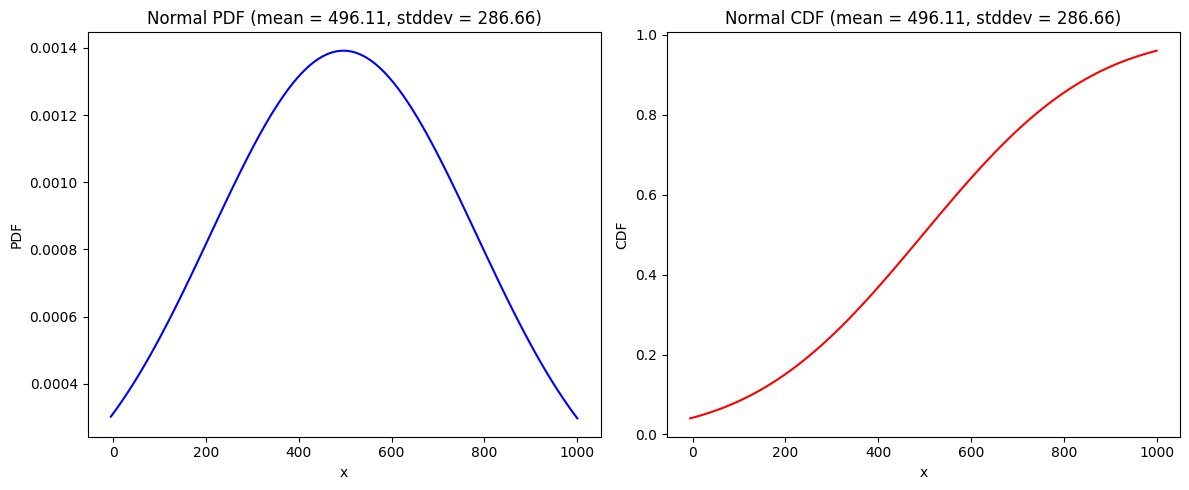

In [6]:
import math

class Normal:
    def __init__(self, data=None, mean=0., stddev=1.):
        if data is None:
            if stddev <= 0:
                raise ValueError("stddev must be a positive value")
            self.mean = float(mean)
            self.stddev = float(stddev)
        else:
            if not isinstance(data, list):
                raise TypeError("data must be a list")
            if len(data) < 2:
                raise ValueError("data must contain multiple values")
            self.mean = float(sum(data) / len(data))
            variance = sum((x - self.mean) ** 2 for x in data) / len(data)
            self.stddev = float(variance ** 0.5)

    def pdf(self, x):
        pi = 3.141592653589793
        exponent = -0.5 * ((x - self.mean) / self.stddev) ** 2
        return (1 / (self.stddev * (2 * pi) ** 0.5)) * np.exp(exponent)

    def cdf(self, x):
        z = (x - self.mean) / (self.stddev * (2 ** 0.5))
        return 0.5 * (1 + math.erf(z))

# Test the Normal class and plot PDF and CDF
def test_normal_distribution():

    normal_dist = Normal(data=data)

    x_values = np.linspace(-5, 1000, 100)

    pdf_values = [normal_dist.pdf(x) for x in x_values]
    cdf_values = [normal_dist.cdf(x) for x in x_values]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, pdf_values, color='blue')
    plt.title(f'Normal PDF (mean = {normal_dist.mean:.2f}, stddev = {normal_dist.stddev:.2f})')
    plt.xlabel('x')
    plt.ylabel('PDF')

    plt.subplot(1, 2, 2)
    plt.plot(x_values, cdf_values, color='red')
    plt.title(f'Normal CDF (mean = {normal_dist.mean:.2f}, stddev = {normal_dist.stddev:.2f})')
    plt.xlabel('x')
    plt.ylabel('CDF')

    plt.tight_layout()
    plt.show()

test_normal_distribution()

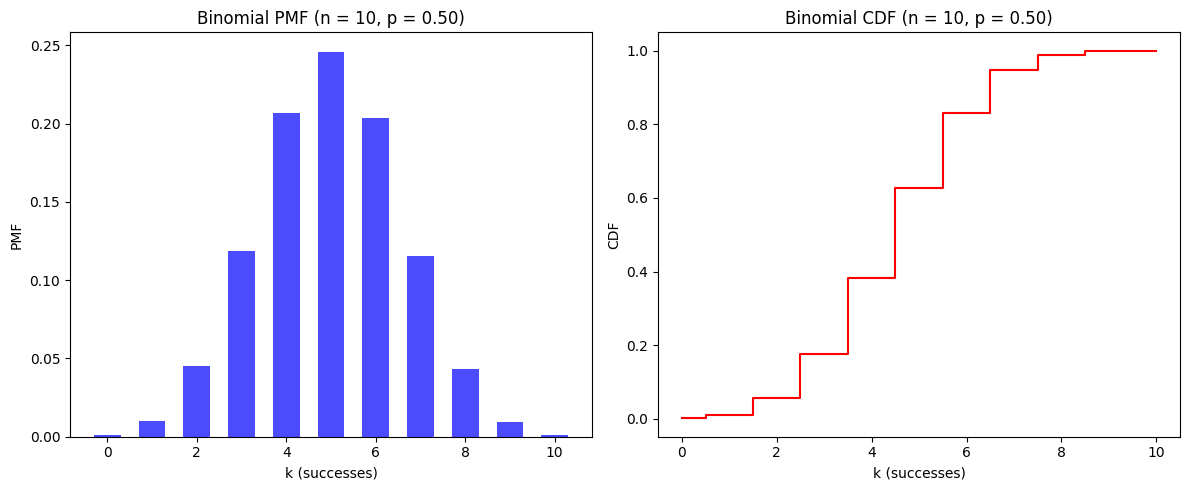

In [9]:
class Binomial:
    """This class represents the binomial distribution"""
    def __init__(self, data=None, n=1, p=0.5):
        """
        Initializes the Binomial distribution with given data, n, or p.

        Parameters:
        - data (list, optional): List of data points to estimate n and p.
        - n (int): Number of Bernoulli trials.
        - p (float): Probability of success in each trial.

        Raises:
        - TypeError: If data is not a list.
        - ValueError: If n is not a positive
            value or if p is not between 0 and 1.
        """
        if data is None:
            if n <= 0:
                raise ValueError("n must be a positive value")
            if p <= 0 or p >= 1:
                raise ValueError("p must be greater than 0 and less than 1")

            self.n = int(n)
            self.p = float(p)
        else:
            # Validate data
            if not isinstance(data, list):
                raise TypeError("data must be a list")
            if len(data) < 2:
                raise ValueError("data must contain multiple values")

            mean = sum(data) / len(data)
            variance = sum((x - mean) ** 2 for x in data) / len(data)

            self.p = 1 - (variance / mean)
            self.n = round(mean / self.p)

            self.p = mean / self.n

    def factorial(self, x):
        """
        Helper method to calculate the factorial of a number.
        """
        if x == 0 or x == 1:
            return 1
        result = 1
        for i in range(2, x + 1):
            result *= i
        return result

    def pmf(self, k):
        """
        Calculates the value of the PMF for a given number of 'successes'.

        Parameters:
        - k (int): The number of successes.

        Returns:
        - float: The PMF value for k.
        """
        k = int(k)

        if k < 0 or k > self.n:
            return 0

        nCk = self.factorial(self.n) / (self.factorial(k)
                                        * self.factorial(self.n - k))

        pmf_value = nCk * (self.p ** k) * ((1 - self.p) ** (self.n - k))

        return pmf_value

    def cdf(self, k):
        """
        Calculates the value of the CDF
        for a given number of 'successes'.

        Parameters:
        - k (int): The number of successes.

        Returns:
        - float: The CDF value for k.
        """

        k = int(k)

        if k < 0:
            return 0

        cdf_value = sum(self.pmf(i) for i in range(k + 1))

        return cdf_value

# Test the Binomial class and plot PMF and CDF
def test_binomial_distribution():
    data = np.random.binomial(10, 0.5, 10000).tolist()

    binom_dist = Binomial(data=data)

    k_values = np.arange(0, binom_dist.n + 1)

    pmf_values = [binom_dist.pmf(k) for k in k_values]
    cdf_values = [binom_dist.cdf(k) for k in k_values]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(k_values, pmf_values, width=0.6, color='blue', alpha=0.7)
    plt.title(f'Binomial PMF (n = {binom_dist.n}, p = {binom_dist.p:.2f})')
    plt.xlabel('k (successes)')
    plt.ylabel('PMF')

    plt.subplot(1, 2, 2)
    plt.step(k_values, cdf_values, where='mid', color='red')
    plt.title(f'Binomial CDF (n = {binom_dist.n}, p = {binom_dist.p:.2f})')
    plt.xlabel('k (successes)')
    plt.ylabel('CDF')

    plt.tight_layout()
    plt.show()

test_binomial_distribution()